In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

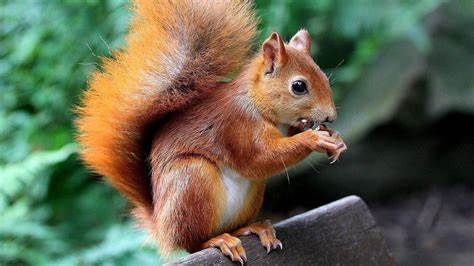

In [2]:
image = Image.open("squirrel.jpg")
image

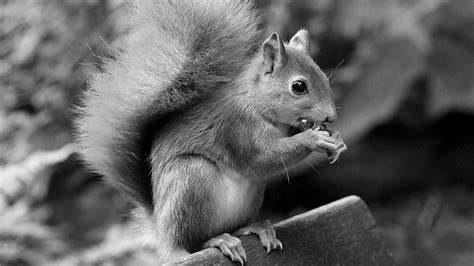

In [3]:
image = image.convert('L')
image

# 直方图

In [4]:
# a: 输入数组，需要分析的数值数据。
# bins(可选): 分组的数量或分组边界数组。默认为10，表示将数据分为10个等宽的区间。
# range(可选): 指定数据的范围，格式为(min, max)，默认为数据的最小值和最大值。
# density(可选): 如果为True，则返回频率密度而不是计数，即直方图面积之和为1。
# weights(可选): 与a形状相同的数组，用于对每个样本的权重分配。
hist: np.ndarray
bin_edges: np.ndarray
hist, bin_edges = np.histogram(image, 256, [0, 256], density=False)
hist.shape, bin_edges.shape

((256,), (257,))

In [5]:
x: np.ndarray = np.array([(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(hist.shape[0])])

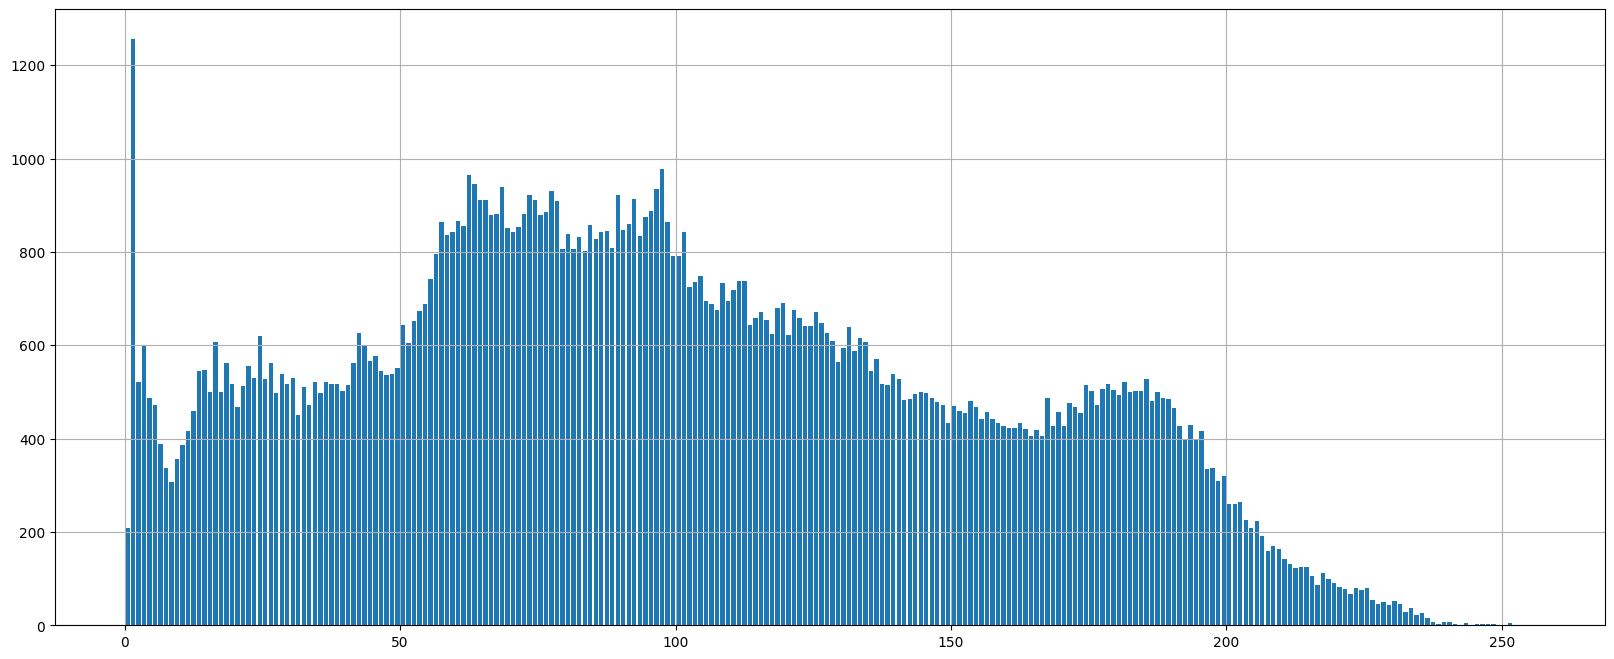

In [6]:
plt.figure(figsize=(20, 8))
plt.bar(x, hist)
plt.grid()

In [7]:
hist_cum: np.ndarray = hist.cumsum()

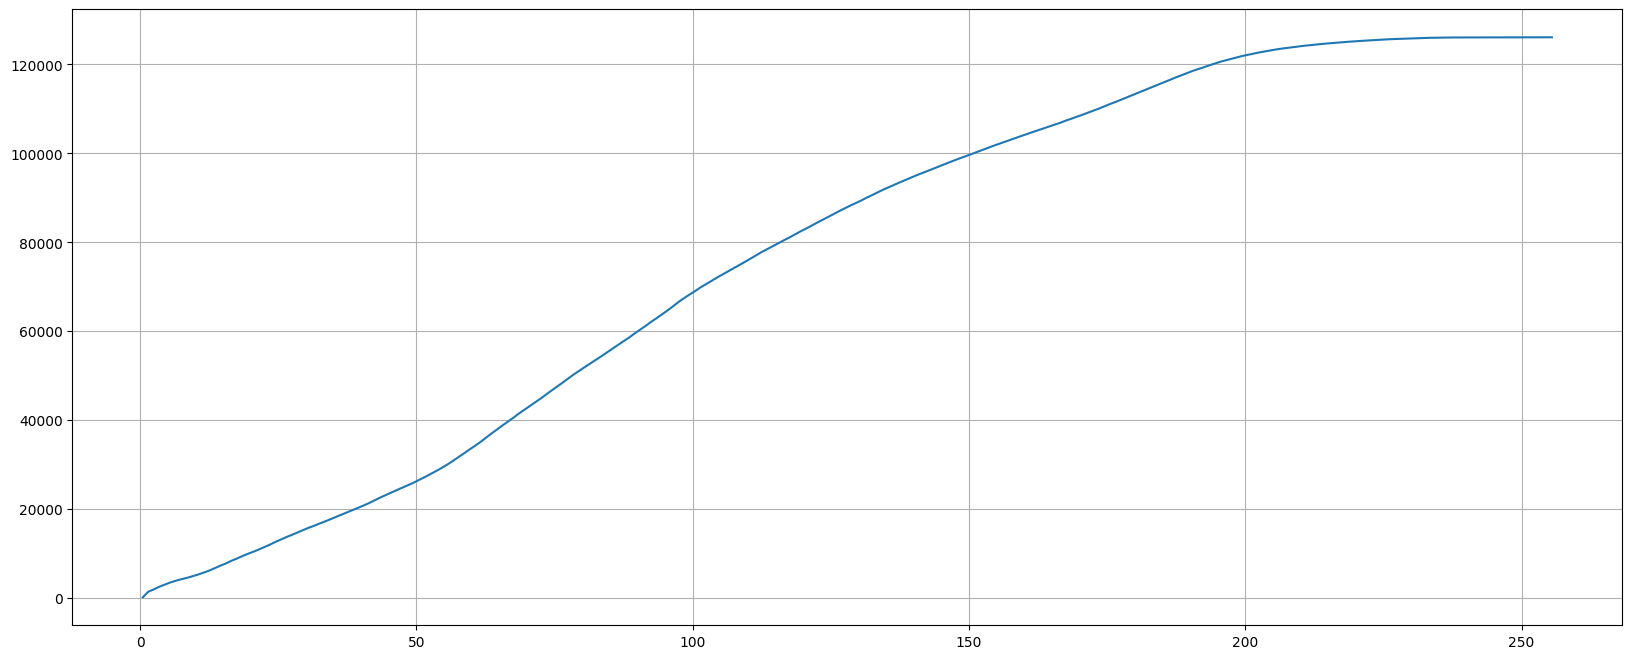

In [8]:
plt.figure(figsize=(20, 8))
plt.plot(x, hist_cum)
plt.grid()

# 直方图均衡化

In [9]:
def histogram_equalization(image: Image.Image) -> Image.Image:
    image_array = np.array(image)

    # 计算直方图
    histogram, bins = np.histogram(image_array.flatten(), 256, [0, 256], density=True)

    # 计算累积分布函数
    cdf = histogram.cumsum()

    # 归一化累积分布函数
    cdf = 255 * cdf / cdf[-1]

    # 使用累积分布函数构建查找表
    lut = np.uint8(cdf)

    # 将查找表应用于原始图像
    equalized_image_array = lut[image_array]

    equalized_image = Image.fromarray(equalized_image_array)

    return equalized_image

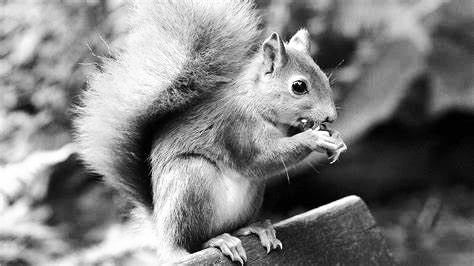

In [10]:
equalized_image = histogram_equalization(image)
equalized_image

In [11]:
equalized_hist: np.ndarray
equalized_bin_edges: np.ndarray
equalized_hist, equalized_bin_edges = np.histogram(equalized_image, 256, [0, 256], density=False)
equalized_hist.shape, equalized_bin_edges.shape

((256,), (257,))

In [12]:
equalized_x: np.ndarray = np.array([(equalized_bin_edges[i] + equalized_bin_edges[i+1]) / 2 for i in range(equalized_hist.shape[0])])

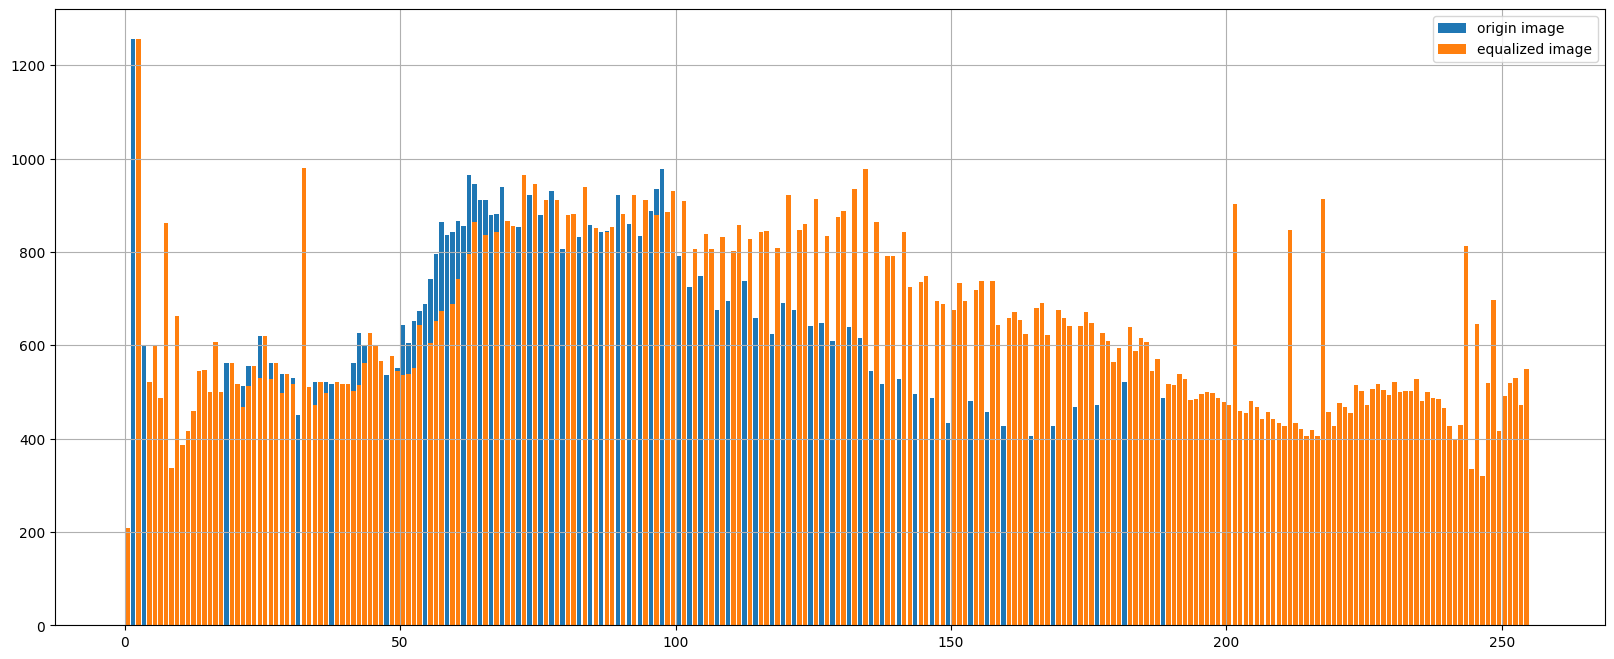

In [13]:
plt.figure(figsize=(20, 8))
plt.bar(x, hist, label="origin image")
plt.bar(equalized_x, equalized_hist, label="equalized image")
plt.grid()
plt.legend(loc='best')